#### Imports

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

##### Load in csv data and format it to images and target data

In [97]:
import csv


data = []
with open("metadata.csv") as file:
    for row in csv.reader(file):
        data.append(row)

data = data[1:]

d = {'filename': [], 'target': []}

for image in data:
    # skip volume data
    if image[22] == "volumes":
        continue
    diagnosis = image[4].split("/")
    diagnosis = diagnosis[len(diagnosis) - 1].lower()
    # set target based on meta data
    if diagnosis != "covid-19":
        if diagnosis == "todo":
            # if not classified yet target = -1
            d['filename'].append(image[23])
            d['target'].append(-1)
        else:
            # if not COVID-19 target = 0
            d['filename'].append(image[23])
            d['target'].append(0)
    else:
        # if it is COVID-19
        if image[6] == "Y":
            # if they survived
            if image[7] == "Y":
                # if they were intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(1)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(2)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(3)
            elif image[7] == "N":
                # if they were not intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(4)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(5)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(6)
            else:
                # if they were intubated is unknown
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(7)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(8)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(9)
        elif image[6] == "N":
            # if they did not survive
            if image[7] == "Y":
                # if they were intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(10)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(11)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(12)
            elif image[7] == "N":
                # if they were not intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(13)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(14)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(15)
            else:
                # if they were intubated is unknown
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(16)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(17)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(18)
        else:
            # if their survival is unknown
            if image[7] == "Y":
                # if they were intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(19)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(20)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(21)
            elif image[7] == "N":
                # if they were not intubated
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(22)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(23)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(23)
            else:
                # if they were intubated is unknown
                if image[8] == "Y":
                    # if they were put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(24)
                elif image[8] == "N":
                    # if they were not put in the icu
                    d['filename'].append(image[23])
                    d['target'].append(25)
                else:
                    # if they were put in the icu is unknown
                    d['filename'].append(image[23])
                    d['target'].append(26)

total = [0] * 28

for target in d['target']:
    if target == -1:
        total[27] += 1
    else:
        total[target] += 1

# set up binary classification (covid vs non-covid)
# all targets > 0 are covid
for i in range(len(d['target'])):
    if d['target'][i] > 0:
        d['target'][i] = 1

print(total)
#print(d)

file.close()


[283, 4, 3, 0, 0, 65, 0, 3, 6, 81, 8, 8, 2, 0, 1, 1, 0, 0, 18, 45, 35, 8, 0, 9, 0, 5, 261, 83]


In [40]:
print(len(d['target']))

929


#### Preprocessing for images

In [104]:
# Load in image data from filenames with PIL
img_dim = 768
images = np.empty((len(d['target']), img_dim, img_dim))

for i in range(len(d['filename'])):
    image = Image.open("images/" + d['filename'][i])
    
    # resize image shape
    image = image.resize((img_dim, img_dim))
    
    # convert to grayscale
    image = image.convert('L')
    
    images[i] = np.array(image)

In [105]:
# normalize values
images = images / 255.0

(929, 768, 768)


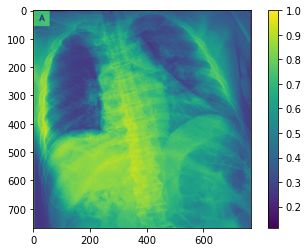

In [106]:
plt.imshow(images[0])
plt.colorbar()
print(images.shape)

#### Split each image into 6 128 x 128 images to train deep learning model. Create new target values that match smaller images

In [112]:
# create new image array and match target values for each broken image
red_dim = 128
split_size = int(img_dim / red_dim)

red_images = np.empty((len(d['target']) * split_size * split_size, red_dim, red_dim))
targets = np.empty((len(d['target']) * split_size * split_size))

print(images[0])

red_ind = 0
for r in range(len(images)):
    for i in range(split_size):
        for j in range(split_size):
            print("image: " + str(r) + " i: " + str(i) + "j: " + str(j))
            start_x = i * (red_dim - 1)
            start_y = j * (red_dim - 1)
            end_x = start_x + red_dim
            end_y = start_y + red_dim
            red_image = images[r][start_x:end_x, start_y:end_y]
            
            red_images[red_ind] = np.array(red_image)
            targets[red_ind] = d['target'][r]
            red_ind += 1
            
        

[[1.         0.99607843 1.         ... 0.2745098  0.27058824 0.27058824]
 [1.         1.         1.         ... 0.2627451  0.25882353 0.25882353]
 [1.         1.         1.         ... 0.2627451  0.25490196 0.25490196]
 ...
 [1.         0.99607843 1.         ... 0.41568627 0.42352941 0.42745098]
 [1.         0.99607843 1.         ... 0.39215686 0.39607843 0.4       ]
 [1.         0.99607843 1.         ... 0.29803922 0.30196078 0.30588235]]
image: 0 i: 0j: 0
image: 0 i: 0j: 1
image: 0 i: 0j: 2
image: 0 i: 0j: 3
image: 0 i: 0j: 4
image: 0 i: 0j: 5
image: 0 i: 1j: 0
image: 0 i: 1j: 1
image: 0 i: 1j: 2
image: 0 i: 1j: 3
image: 0 i: 1j: 4
image: 0 i: 1j: 5
image: 0 i: 2j: 0
image: 0 i: 2j: 1
image: 0 i: 2j: 2
image: 0 i: 2j: 3
image: 0 i: 2j: 4
image: 0 i: 2j: 5
image: 0 i: 3j: 0
image: 0 i: 3j: 1
image: 0 i: 3j: 2
image: 0 i: 3j: 3
image: 0 i: 3j: 4
image: 0 i: 3j: 5
image: 0 i: 4j: 0
image: 0 i: 4j: 1
image: 0 i: 4j: 2
image: 0 i: 4j: 3
image: 0 i: 4j: 4
image: 0 i: 4j: 5
image: 0 i: 5j: 

image: 31 i: 3j: 4
image: 31 i: 3j: 5
image: 31 i: 4j: 0
image: 31 i: 4j: 1
image: 31 i: 4j: 2
image: 31 i: 4j: 3
image: 31 i: 4j: 4
image: 31 i: 4j: 5
image: 31 i: 5j: 0
image: 31 i: 5j: 1
image: 31 i: 5j: 2
image: 31 i: 5j: 3
image: 31 i: 5j: 4
image: 31 i: 5j: 5
image: 32 i: 0j: 0
image: 32 i: 0j: 1
image: 32 i: 0j: 2
image: 32 i: 0j: 3
image: 32 i: 0j: 4
image: 32 i: 0j: 5
image: 32 i: 1j: 0
image: 32 i: 1j: 1
image: 32 i: 1j: 2
image: 32 i: 1j: 3
image: 32 i: 1j: 4
image: 32 i: 1j: 5
image: 32 i: 2j: 0
image: 32 i: 2j: 1
image: 32 i: 2j: 2
image: 32 i: 2j: 3
image: 32 i: 2j: 4
image: 32 i: 2j: 5
image: 32 i: 3j: 0
image: 32 i: 3j: 1
image: 32 i: 3j: 2
image: 32 i: 3j: 3
image: 32 i: 3j: 4
image: 32 i: 3j: 5
image: 32 i: 4j: 0
image: 32 i: 4j: 1
image: 32 i: 4j: 2
image: 32 i: 4j: 3
image: 32 i: 4j: 4
image: 32 i: 4j: 5
image: 32 i: 5j: 0
image: 32 i: 5j: 1
image: 32 i: 5j: 2
image: 32 i: 5j: 3
image: 32 i: 5j: 4
image: 32 i: 5j: 5
image: 33 i: 0j: 0
image: 33 i: 0j: 1
image: 33 i:

image: 61 i: 0j: 3
image: 61 i: 0j: 4
image: 61 i: 0j: 5
image: 61 i: 1j: 0
image: 61 i: 1j: 1
image: 61 i: 1j: 2
image: 61 i: 1j: 3
image: 61 i: 1j: 4
image: 61 i: 1j: 5
image: 61 i: 2j: 0
image: 61 i: 2j: 1
image: 61 i: 2j: 2
image: 61 i: 2j: 3
image: 61 i: 2j: 4
image: 61 i: 2j: 5
image: 61 i: 3j: 0
image: 61 i: 3j: 1
image: 61 i: 3j: 2
image: 61 i: 3j: 3
image: 61 i: 3j: 4
image: 61 i: 3j: 5
image: 61 i: 4j: 0
image: 61 i: 4j: 1
image: 61 i: 4j: 2
image: 61 i: 4j: 3
image: 61 i: 4j: 4
image: 61 i: 4j: 5
image: 61 i: 5j: 0
image: 61 i: 5j: 1
image: 61 i: 5j: 2
image: 61 i: 5j: 3
image: 61 i: 5j: 4
image: 61 i: 5j: 5
image: 62 i: 0j: 0
image: 62 i: 0j: 1
image: 62 i: 0j: 2
image: 62 i: 0j: 3
image: 62 i: 0j: 4
image: 62 i: 0j: 5
image: 62 i: 1j: 0
image: 62 i: 1j: 1
image: 62 i: 1j: 2
image: 62 i: 1j: 3
image: 62 i: 1j: 4
image: 62 i: 1j: 5
image: 62 i: 2j: 0
image: 62 i: 2j: 1
image: 62 i: 2j: 2
image: 62 i: 2j: 3
image: 62 i: 2j: 4
image: 62 i: 2j: 5
image: 62 i: 3j: 0
image: 62 i:

image: 89 i: 3j: 3
image: 89 i: 3j: 4
image: 89 i: 3j: 5
image: 89 i: 4j: 0
image: 89 i: 4j: 1
image: 89 i: 4j: 2
image: 89 i: 4j: 3
image: 89 i: 4j: 4
image: 89 i: 4j: 5
image: 89 i: 5j: 0
image: 89 i: 5j: 1
image: 89 i: 5j: 2
image: 89 i: 5j: 3
image: 89 i: 5j: 4
image: 89 i: 5j: 5
image: 90 i: 0j: 0
image: 90 i: 0j: 1
image: 90 i: 0j: 2
image: 90 i: 0j: 3
image: 90 i: 0j: 4
image: 90 i: 0j: 5
image: 90 i: 1j: 0
image: 90 i: 1j: 1
image: 90 i: 1j: 2
image: 90 i: 1j: 3
image: 90 i: 1j: 4
image: 90 i: 1j: 5
image: 90 i: 2j: 0
image: 90 i: 2j: 1
image: 90 i: 2j: 2
image: 90 i: 2j: 3
image: 90 i: 2j: 4
image: 90 i: 2j: 5
image: 90 i: 3j: 0
image: 90 i: 3j: 1
image: 90 i: 3j: 2
image: 90 i: 3j: 3
image: 90 i: 3j: 4
image: 90 i: 3j: 5
image: 90 i: 4j: 0
image: 90 i: 4j: 1
image: 90 i: 4j: 2
image: 90 i: 4j: 3
image: 90 i: 4j: 4
image: 90 i: 4j: 5
image: 90 i: 5j: 0
image: 90 i: 5j: 1
image: 90 i: 5j: 2
image: 90 i: 5j: 3
image: 90 i: 5j: 4
image: 90 i: 5j: 5
image: 91 i: 0j: 0
image: 91 i:

image: 121 i: 2j: 0
image: 121 i: 2j: 1
image: 121 i: 2j: 2
image: 121 i: 2j: 3
image: 121 i: 2j: 4
image: 121 i: 2j: 5
image: 121 i: 3j: 0
image: 121 i: 3j: 1
image: 121 i: 3j: 2
image: 121 i: 3j: 3
image: 121 i: 3j: 4
image: 121 i: 3j: 5
image: 121 i: 4j: 0
image: 121 i: 4j: 1
image: 121 i: 4j: 2
image: 121 i: 4j: 3
image: 121 i: 4j: 4
image: 121 i: 4j: 5
image: 121 i: 5j: 0
image: 121 i: 5j: 1
image: 121 i: 5j: 2
image: 121 i: 5j: 3
image: 121 i: 5j: 4
image: 121 i: 5j: 5
image: 122 i: 0j: 0
image: 122 i: 0j: 1
image: 122 i: 0j: 2
image: 122 i: 0j: 3
image: 122 i: 0j: 4
image: 122 i: 0j: 5
image: 122 i: 1j: 0
image: 122 i: 1j: 1
image: 122 i: 1j: 2
image: 122 i: 1j: 3
image: 122 i: 1j: 4
image: 122 i: 1j: 5
image: 122 i: 2j: 0
image: 122 i: 2j: 1
image: 122 i: 2j: 2
image: 122 i: 2j: 3
image: 122 i: 2j: 4
image: 122 i: 2j: 5
image: 122 i: 3j: 0
image: 122 i: 3j: 1
image: 122 i: 3j: 2
image: 122 i: 3j: 3
image: 122 i: 3j: 4
image: 122 i: 3j: 5
image: 122 i: 4j: 0
image: 122 i: 4j: 1


image: 154 i: 0j: 4
image: 154 i: 0j: 5
image: 154 i: 1j: 0
image: 154 i: 1j: 1
image: 154 i: 1j: 2
image: 154 i: 1j: 3
image: 154 i: 1j: 4
image: 154 i: 1j: 5
image: 154 i: 2j: 0
image: 154 i: 2j: 1
image: 154 i: 2j: 2
image: 154 i: 2j: 3
image: 154 i: 2j: 4
image: 154 i: 2j: 5
image: 154 i: 3j: 0
image: 154 i: 3j: 1
image: 154 i: 3j: 2
image: 154 i: 3j: 3
image: 154 i: 3j: 4
image: 154 i: 3j: 5
image: 154 i: 4j: 0
image: 154 i: 4j: 1
image: 154 i: 4j: 2
image: 154 i: 4j: 3
image: 154 i: 4j: 4
image: 154 i: 4j: 5
image: 154 i: 5j: 0
image: 154 i: 5j: 1
image: 154 i: 5j: 2
image: 154 i: 5j: 3
image: 154 i: 5j: 4
image: 154 i: 5j: 5
image: 155 i: 0j: 0
image: 155 i: 0j: 1
image: 155 i: 0j: 2
image: 155 i: 0j: 3
image: 155 i: 0j: 4
image: 155 i: 0j: 5
image: 155 i: 1j: 0
image: 155 i: 1j: 1
image: 155 i: 1j: 2
image: 155 i: 1j: 3
image: 155 i: 1j: 4
image: 155 i: 1j: 5
image: 155 i: 2j: 0
image: 155 i: 2j: 1
image: 155 i: 2j: 2
image: 155 i: 2j: 3
image: 155 i: 2j: 4
image: 155 i: 2j: 5


image: 172 i: 1j: 1
image: 172 i: 1j: 2
image: 172 i: 1j: 3
image: 172 i: 1j: 4
image: 172 i: 1j: 5
image: 172 i: 2j: 0
image: 172 i: 2j: 1
image: 172 i: 2j: 2
image: 172 i: 2j: 3
image: 172 i: 2j: 4
image: 172 i: 2j: 5
image: 172 i: 3j: 0
image: 172 i: 3j: 1
image: 172 i: 3j: 2
image: 172 i: 3j: 3
image: 172 i: 3j: 4
image: 172 i: 3j: 5
image: 172 i: 4j: 0
image: 172 i: 4j: 1
image: 172 i: 4j: 2
image: 172 i: 4j: 3
image: 172 i: 4j: 4
image: 172 i: 4j: 5
image: 172 i: 5j: 0
image: 172 i: 5j: 1
image: 172 i: 5j: 2
image: 172 i: 5j: 3
image: 172 i: 5j: 4
image: 172 i: 5j: 5
image: 173 i: 0j: 0
image: 173 i: 0j: 1
image: 173 i: 0j: 2
image: 173 i: 0j: 3
image: 173 i: 0j: 4
image: 173 i: 0j: 5
image: 173 i: 1j: 0
image: 173 i: 1j: 1
image: 173 i: 1j: 2
image: 173 i: 1j: 3
image: 173 i: 1j: 4
image: 173 i: 1j: 5
image: 173 i: 2j: 0
image: 173 i: 2j: 1
image: 173 i: 2j: 2
image: 173 i: 2j: 3
image: 173 i: 2j: 4
image: 173 i: 2j: 5
image: 173 i: 3j: 0
image: 173 i: 3j: 1
image: 173 i: 3j: 2


image: 187 i: 0j: 1
image: 187 i: 0j: 2
image: 187 i: 0j: 3
image: 187 i: 0j: 4
image: 187 i: 0j: 5
image: 187 i: 1j: 0
image: 187 i: 1j: 1
image: 187 i: 1j: 2
image: 187 i: 1j: 3
image: 187 i: 1j: 4
image: 187 i: 1j: 5
image: 187 i: 2j: 0
image: 187 i: 2j: 1
image: 187 i: 2j: 2
image: 187 i: 2j: 3
image: 187 i: 2j: 4
image: 187 i: 2j: 5
image: 187 i: 3j: 0
image: 187 i: 3j: 1
image: 187 i: 3j: 2
image: 187 i: 3j: 3
image: 187 i: 3j: 4
image: 187 i: 3j: 5
image: 187 i: 4j: 0
image: 187 i: 4j: 1
image: 187 i: 4j: 2
image: 187 i: 4j: 3
image: 187 i: 4j: 4
image: 187 i: 4j: 5
image: 187 i: 5j: 0
image: 187 i: 5j: 1
image: 187 i: 5j: 2
image: 187 i: 5j: 3
image: 187 i: 5j: 4
image: 187 i: 5j: 5
image: 188 i: 0j: 0
image: 188 i: 0j: 1
image: 188 i: 0j: 2
image: 188 i: 0j: 3
image: 188 i: 0j: 4
image: 188 i: 0j: 5
image: 188 i: 1j: 0
image: 188 i: 1j: 1
image: 188 i: 1j: 2
image: 188 i: 1j: 3
image: 188 i: 1j: 4
image: 188 i: 1j: 5
image: 188 i: 2j: 0
image: 188 i: 2j: 1
image: 188 i: 2j: 2


image: 201 i: 3j: 1
image: 201 i: 3j: 2
image: 201 i: 3j: 3
image: 201 i: 3j: 4
image: 201 i: 3j: 5
image: 201 i: 4j: 0
image: 201 i: 4j: 1
image: 201 i: 4j: 2
image: 201 i: 4j: 3
image: 201 i: 4j: 4
image: 201 i: 4j: 5
image: 201 i: 5j: 0
image: 201 i: 5j: 1
image: 201 i: 5j: 2
image: 201 i: 5j: 3
image: 201 i: 5j: 4
image: 201 i: 5j: 5
image: 202 i: 0j: 0
image: 202 i: 0j: 1
image: 202 i: 0j: 2
image: 202 i: 0j: 3
image: 202 i: 0j: 4
image: 202 i: 0j: 5
image: 202 i: 1j: 0
image: 202 i: 1j: 1
image: 202 i: 1j: 2
image: 202 i: 1j: 3
image: 202 i: 1j: 4
image: 202 i: 1j: 5
image: 202 i: 2j: 0
image: 202 i: 2j: 1
image: 202 i: 2j: 2
image: 202 i: 2j: 3
image: 202 i: 2j: 4
image: 202 i: 2j: 5
image: 202 i: 3j: 0
image: 202 i: 3j: 1
image: 202 i: 3j: 2
image: 202 i: 3j: 3
image: 202 i: 3j: 4
image: 202 i: 3j: 5
image: 202 i: 4j: 0
image: 202 i: 4j: 1
image: 202 i: 4j: 2
image: 202 i: 4j: 3
image: 202 i: 4j: 4
image: 202 i: 4j: 5
image: 202 i: 5j: 0
image: 202 i: 5j: 1
image: 202 i: 5j: 2


image: 220 i: 2j: 0
image: 220 i: 2j: 1
image: 220 i: 2j: 2
image: 220 i: 2j: 3
image: 220 i: 2j: 4
image: 220 i: 2j: 5
image: 220 i: 3j: 0
image: 220 i: 3j: 1
image: 220 i: 3j: 2
image: 220 i: 3j: 3
image: 220 i: 3j: 4
image: 220 i: 3j: 5
image: 220 i: 4j: 0
image: 220 i: 4j: 1
image: 220 i: 4j: 2
image: 220 i: 4j: 3
image: 220 i: 4j: 4
image: 220 i: 4j: 5
image: 220 i: 5j: 0
image: 220 i: 5j: 1
image: 220 i: 5j: 2
image: 220 i: 5j: 3
image: 220 i: 5j: 4
image: 220 i: 5j: 5
image: 221 i: 0j: 0
image: 221 i: 0j: 1
image: 221 i: 0j: 2
image: 221 i: 0j: 3
image: 221 i: 0j: 4
image: 221 i: 0j: 5
image: 221 i: 1j: 0
image: 221 i: 1j: 1
image: 221 i: 1j: 2
image: 221 i: 1j: 3
image: 221 i: 1j: 4
image: 221 i: 1j: 5
image: 221 i: 2j: 0
image: 221 i: 2j: 1
image: 221 i: 2j: 2
image: 221 i: 2j: 3
image: 221 i: 2j: 4
image: 221 i: 2j: 5
image: 221 i: 3j: 0
image: 221 i: 3j: 1
image: 221 i: 3j: 2
image: 221 i: 3j: 3
image: 221 i: 3j: 4
image: 221 i: 3j: 5
image: 221 i: 4j: 0
image: 221 i: 4j: 1


image: 239 i: 1j: 2
image: 239 i: 1j: 3
image: 239 i: 1j: 4
image: 239 i: 1j: 5
image: 239 i: 2j: 0
image: 239 i: 2j: 1
image: 239 i: 2j: 2
image: 239 i: 2j: 3
image: 239 i: 2j: 4
image: 239 i: 2j: 5
image: 239 i: 3j: 0
image: 239 i: 3j: 1
image: 239 i: 3j: 2
image: 239 i: 3j: 3
image: 239 i: 3j: 4
image: 239 i: 3j: 5
image: 239 i: 4j: 0
image: 239 i: 4j: 1
image: 239 i: 4j: 2
image: 239 i: 4j: 3
image: 239 i: 4j: 4
image: 239 i: 4j: 5
image: 239 i: 5j: 0
image: 239 i: 5j: 1
image: 239 i: 5j: 2
image: 239 i: 5j: 3
image: 239 i: 5j: 4
image: 239 i: 5j: 5
image: 240 i: 0j: 0
image: 240 i: 0j: 1
image: 240 i: 0j: 2
image: 240 i: 0j: 3
image: 240 i: 0j: 4
image: 240 i: 0j: 5
image: 240 i: 1j: 0
image: 240 i: 1j: 1
image: 240 i: 1j: 2
image: 240 i: 1j: 3
image: 240 i: 1j: 4
image: 240 i: 1j: 5
image: 240 i: 2j: 0
image: 240 i: 2j: 1
image: 240 i: 2j: 2
image: 240 i: 2j: 3
image: 240 i: 2j: 4
image: 240 i: 2j: 5
image: 240 i: 3j: 0
image: 240 i: 3j: 1
image: 240 i: 3j: 2
image: 240 i: 3j: 3


image: 264 i: 3j: 1
image: 264 i: 3j: 2
image: 264 i: 3j: 3
image: 264 i: 3j: 4
image: 264 i: 3j: 5
image: 264 i: 4j: 0
image: 264 i: 4j: 1
image: 264 i: 4j: 2
image: 264 i: 4j: 3
image: 264 i: 4j: 4
image: 264 i: 4j: 5
image: 264 i: 5j: 0
image: 264 i: 5j: 1
image: 264 i: 5j: 2
image: 264 i: 5j: 3
image: 264 i: 5j: 4
image: 264 i: 5j: 5
image: 265 i: 0j: 0
image: 265 i: 0j: 1
image: 265 i: 0j: 2
image: 265 i: 0j: 3
image: 265 i: 0j: 4
image: 265 i: 0j: 5
image: 265 i: 1j: 0
image: 265 i: 1j: 1
image: 265 i: 1j: 2
image: 265 i: 1j: 3
image: 265 i: 1j: 4
image: 265 i: 1j: 5
image: 265 i: 2j: 0
image: 265 i: 2j: 1
image: 265 i: 2j: 2
image: 265 i: 2j: 3
image: 265 i: 2j: 4
image: 265 i: 2j: 5
image: 265 i: 3j: 0
image: 265 i: 3j: 1
image: 265 i: 3j: 2
image: 265 i: 3j: 3
image: 265 i: 3j: 4
image: 265 i: 3j: 5
image: 265 i: 4j: 0
image: 265 i: 4j: 1
image: 265 i: 4j: 2
image: 265 i: 4j: 3
image: 265 i: 4j: 4
image: 265 i: 4j: 5
image: 265 i: 5j: 0
image: 265 i: 5j: 1
image: 265 i: 5j: 2


image: 286 i: 5j: 0
image: 286 i: 5j: 1
image: 286 i: 5j: 2
image: 286 i: 5j: 3
image: 286 i: 5j: 4
image: 286 i: 5j: 5
image: 287 i: 0j: 0
image: 287 i: 0j: 1
image: 287 i: 0j: 2
image: 287 i: 0j: 3
image: 287 i: 0j: 4
image: 287 i: 0j: 5
image: 287 i: 1j: 0
image: 287 i: 1j: 1
image: 287 i: 1j: 2
image: 287 i: 1j: 3
image: 287 i: 1j: 4
image: 287 i: 1j: 5
image: 287 i: 2j: 0
image: 287 i: 2j: 1
image: 287 i: 2j: 2
image: 287 i: 2j: 3
image: 287 i: 2j: 4
image: 287 i: 2j: 5
image: 287 i: 3j: 0
image: 287 i: 3j: 1
image: 287 i: 3j: 2
image: 287 i: 3j: 3
image: 287 i: 3j: 4
image: 287 i: 3j: 5
image: 287 i: 4j: 0
image: 287 i: 4j: 1
image: 287 i: 4j: 2
image: 287 i: 4j: 3
image: 287 i: 4j: 4
image: 287 i: 4j: 5
image: 287 i: 5j: 0
image: 287 i: 5j: 1
image: 287 i: 5j: 2
image: 287 i: 5j: 3
image: 287 i: 5j: 4
image: 287 i: 5j: 5
image: 288 i: 0j: 0
image: 288 i: 0j: 1
image: 288 i: 0j: 2
image: 288 i: 0j: 3
image: 288 i: 0j: 4
image: 288 i: 0j: 5
image: 288 i: 1j: 0
image: 288 i: 1j: 1


image: 309 i: 0j: 1
image: 309 i: 0j: 2
image: 309 i: 0j: 3
image: 309 i: 0j: 4
image: 309 i: 0j: 5
image: 309 i: 1j: 0
image: 309 i: 1j: 1
image: 309 i: 1j: 2
image: 309 i: 1j: 3
image: 309 i: 1j: 4
image: 309 i: 1j: 5
image: 309 i: 2j: 0
image: 309 i: 2j: 1
image: 309 i: 2j: 2
image: 309 i: 2j: 3
image: 309 i: 2j: 4
image: 309 i: 2j: 5
image: 309 i: 3j: 0
image: 309 i: 3j: 1
image: 309 i: 3j: 2
image: 309 i: 3j: 3
image: 309 i: 3j: 4
image: 309 i: 3j: 5
image: 309 i: 4j: 0
image: 309 i: 4j: 1
image: 309 i: 4j: 2
image: 309 i: 4j: 3
image: 309 i: 4j: 4
image: 309 i: 4j: 5
image: 309 i: 5j: 0
image: 309 i: 5j: 1
image: 309 i: 5j: 2
image: 309 i: 5j: 3
image: 309 i: 5j: 4
image: 309 i: 5j: 5
image: 310 i: 0j: 0
image: 310 i: 0j: 1
image: 310 i: 0j: 2
image: 310 i: 0j: 3
image: 310 i: 0j: 4
image: 310 i: 0j: 5
image: 310 i: 1j: 0
image: 310 i: 1j: 1
image: 310 i: 1j: 2
image: 310 i: 1j: 3
image: 310 i: 1j: 4
image: 310 i: 1j: 5
image: 310 i: 2j: 0
image: 310 i: 2j: 1
image: 310 i: 2j: 2


image: 330 i: 4j: 1
image: 330 i: 4j: 2
image: 330 i: 4j: 3
image: 330 i: 4j: 4
image: 330 i: 4j: 5
image: 330 i: 5j: 0
image: 330 i: 5j: 1
image: 330 i: 5j: 2
image: 330 i: 5j: 3
image: 330 i: 5j: 4
image: 330 i: 5j: 5
image: 331 i: 0j: 0
image: 331 i: 0j: 1
image: 331 i: 0j: 2
image: 331 i: 0j: 3
image: 331 i: 0j: 4
image: 331 i: 0j: 5
image: 331 i: 1j: 0
image: 331 i: 1j: 1
image: 331 i: 1j: 2
image: 331 i: 1j: 3
image: 331 i: 1j: 4
image: 331 i: 1j: 5
image: 331 i: 2j: 0
image: 331 i: 2j: 1
image: 331 i: 2j: 2
image: 331 i: 2j: 3
image: 331 i: 2j: 4
image: 331 i: 2j: 5
image: 331 i: 3j: 0
image: 331 i: 3j: 1
image: 331 i: 3j: 2
image: 331 i: 3j: 3
image: 331 i: 3j: 4
image: 331 i: 3j: 5
image: 331 i: 4j: 0
image: 331 i: 4j: 1
image: 331 i: 4j: 2
image: 331 i: 4j: 3
image: 331 i: 4j: 4
image: 331 i: 4j: 5
image: 331 i: 5j: 0
image: 331 i: 5j: 1
image: 331 i: 5j: 2
image: 331 i: 5j: 3
image: 331 i: 5j: 4
image: 331 i: 5j: 5
image: 332 i: 0j: 0
image: 332 i: 0j: 1
image: 332 i: 0j: 2


image: 352 i: 3j: 4
image: 352 i: 3j: 5
image: 352 i: 4j: 0
image: 352 i: 4j: 1
image: 352 i: 4j: 2
image: 352 i: 4j: 3
image: 352 i: 4j: 4
image: 352 i: 4j: 5
image: 352 i: 5j: 0
image: 352 i: 5j: 1
image: 352 i: 5j: 2
image: 352 i: 5j: 3
image: 352 i: 5j: 4
image: 352 i: 5j: 5
image: 353 i: 0j: 0
image: 353 i: 0j: 1
image: 353 i: 0j: 2
image: 353 i: 0j: 3
image: 353 i: 0j: 4
image: 353 i: 0j: 5
image: 353 i: 1j: 0
image: 353 i: 1j: 1
image: 353 i: 1j: 2
image: 353 i: 1j: 3
image: 353 i: 1j: 4
image: 353 i: 1j: 5
image: 353 i: 2j: 0
image: 353 i: 2j: 1
image: 353 i: 2j: 2
image: 353 i: 2j: 3
image: 353 i: 2j: 4
image: 353 i: 2j: 5
image: 353 i: 3j: 0
image: 353 i: 3j: 1
image: 353 i: 3j: 2
image: 353 i: 3j: 3
image: 353 i: 3j: 4
image: 353 i: 3j: 5
image: 353 i: 4j: 0
image: 353 i: 4j: 1
image: 353 i: 4j: 2
image: 353 i: 4j: 3
image: 353 i: 4j: 4
image: 353 i: 4j: 5
image: 353 i: 5j: 0
image: 353 i: 5j: 1
image: 353 i: 5j: 2
image: 353 i: 5j: 3
image: 353 i: 5j: 4
image: 353 i: 5j: 5


image: 373 i: 2j: 5
image: 373 i: 3j: 0
image: 373 i: 3j: 1
image: 373 i: 3j: 2
image: 373 i: 3j: 3
image: 373 i: 3j: 4
image: 373 i: 3j: 5
image: 373 i: 4j: 0
image: 373 i: 4j: 1
image: 373 i: 4j: 2
image: 373 i: 4j: 3
image: 373 i: 4j: 4
image: 373 i: 4j: 5
image: 373 i: 5j: 0
image: 373 i: 5j: 1
image: 373 i: 5j: 2
image: 373 i: 5j: 3
image: 373 i: 5j: 4
image: 373 i: 5j: 5
image: 374 i: 0j: 0
image: 374 i: 0j: 1
image: 374 i: 0j: 2
image: 374 i: 0j: 3
image: 374 i: 0j: 4
image: 374 i: 0j: 5
image: 374 i: 1j: 0
image: 374 i: 1j: 1
image: 374 i: 1j: 2
image: 374 i: 1j: 3
image: 374 i: 1j: 4
image: 374 i: 1j: 5
image: 374 i: 2j: 0
image: 374 i: 2j: 1
image: 374 i: 2j: 2
image: 374 i: 2j: 3
image: 374 i: 2j: 4
image: 374 i: 2j: 5
image: 374 i: 3j: 0
image: 374 i: 3j: 1
image: 374 i: 3j: 2
image: 374 i: 3j: 3
image: 374 i: 3j: 4
image: 374 i: 3j: 5
image: 374 i: 4j: 0
image: 374 i: 4j: 1
image: 374 i: 4j: 2
image: 374 i: 4j: 3
image: 374 i: 4j: 4
image: 374 i: 4j: 5
image: 374 i: 5j: 0


image: 394 i: 5j: 0
image: 394 i: 5j: 1
image: 394 i: 5j: 2
image: 394 i: 5j: 3
image: 394 i: 5j: 4
image: 394 i: 5j: 5
image: 395 i: 0j: 0
image: 395 i: 0j: 1
image: 395 i: 0j: 2
image: 395 i: 0j: 3
image: 395 i: 0j: 4
image: 395 i: 0j: 5
image: 395 i: 1j: 0
image: 395 i: 1j: 1
image: 395 i: 1j: 2
image: 395 i: 1j: 3
image: 395 i: 1j: 4
image: 395 i: 1j: 5
image: 395 i: 2j: 0
image: 395 i: 2j: 1
image: 395 i: 2j: 2
image: 395 i: 2j: 3
image: 395 i: 2j: 4
image: 395 i: 2j: 5
image: 395 i: 3j: 0
image: 395 i: 3j: 1
image: 395 i: 3j: 2
image: 395 i: 3j: 3
image: 395 i: 3j: 4
image: 395 i: 3j: 5
image: 395 i: 4j: 0
image: 395 i: 4j: 1
image: 395 i: 4j: 2
image: 395 i: 4j: 3
image: 395 i: 4j: 4
image: 395 i: 4j: 5
image: 395 i: 5j: 0
image: 395 i: 5j: 1
image: 395 i: 5j: 2
image: 395 i: 5j: 3
image: 395 i: 5j: 4
image: 395 i: 5j: 5
image: 396 i: 0j: 0
image: 396 i: 0j: 1
image: 396 i: 0j: 2
image: 396 i: 0j: 3
image: 396 i: 0j: 4
image: 396 i: 0j: 5
image: 396 i: 1j: 0
image: 396 i: 1j: 1


image: 416 i: 4j: 1
image: 416 i: 4j: 2
image: 416 i: 4j: 3
image: 416 i: 4j: 4
image: 416 i: 4j: 5
image: 416 i: 5j: 0
image: 416 i: 5j: 1
image: 416 i: 5j: 2
image: 416 i: 5j: 3
image: 416 i: 5j: 4
image: 416 i: 5j: 5
image: 417 i: 0j: 0
image: 417 i: 0j: 1
image: 417 i: 0j: 2
image: 417 i: 0j: 3
image: 417 i: 0j: 4
image: 417 i: 0j: 5
image: 417 i: 1j: 0
image: 417 i: 1j: 1
image: 417 i: 1j: 2
image: 417 i: 1j: 3
image: 417 i: 1j: 4
image: 417 i: 1j: 5
image: 417 i: 2j: 0
image: 417 i: 2j: 1
image: 417 i: 2j: 2
image: 417 i: 2j: 3
image: 417 i: 2j: 4
image: 417 i: 2j: 5
image: 417 i: 3j: 0
image: 417 i: 3j: 1
image: 417 i: 3j: 2
image: 417 i: 3j: 3
image: 417 i: 3j: 4
image: 417 i: 3j: 5
image: 417 i: 4j: 0
image: 417 i: 4j: 1
image: 417 i: 4j: 2
image: 417 i: 4j: 3
image: 417 i: 4j: 4
image: 417 i: 4j: 5
image: 417 i: 5j: 0
image: 417 i: 5j: 1
image: 417 i: 5j: 2
image: 417 i: 5j: 3
image: 417 i: 5j: 4
image: 417 i: 5j: 5
image: 418 i: 0j: 0
image: 418 i: 0j: 1
image: 418 i: 0j: 2


image: 432 i: 2j: 4
image: 432 i: 2j: 5
image: 432 i: 3j: 0
image: 432 i: 3j: 1
image: 432 i: 3j: 2
image: 432 i: 3j: 3
image: 432 i: 3j: 4
image: 432 i: 3j: 5
image: 432 i: 4j: 0
image: 432 i: 4j: 1
image: 432 i: 4j: 2
image: 432 i: 4j: 3
image: 432 i: 4j: 4
image: 432 i: 4j: 5
image: 432 i: 5j: 0
image: 432 i: 5j: 1
image: 432 i: 5j: 2
image: 432 i: 5j: 3
image: 432 i: 5j: 4
image: 432 i: 5j: 5
image: 433 i: 0j: 0
image: 433 i: 0j: 1
image: 433 i: 0j: 2
image: 433 i: 0j: 3
image: 433 i: 0j: 4
image: 433 i: 0j: 5
image: 433 i: 1j: 0
image: 433 i: 1j: 1
image: 433 i: 1j: 2
image: 433 i: 1j: 3
image: 433 i: 1j: 4
image: 433 i: 1j: 5
image: 433 i: 2j: 0
image: 433 i: 2j: 1
image: 433 i: 2j: 2
image: 433 i: 2j: 3
image: 433 i: 2j: 4
image: 433 i: 2j: 5
image: 433 i: 3j: 0
image: 433 i: 3j: 1
image: 433 i: 3j: 2
image: 433 i: 3j: 3
image: 433 i: 3j: 4
image: 433 i: 3j: 5
image: 433 i: 4j: 0
image: 433 i: 4j: 1
image: 433 i: 4j: 2
image: 433 i: 4j: 3
image: 433 i: 4j: 4
image: 433 i: 4j: 5


image: 454 i: 3j: 1
image: 454 i: 3j: 2
image: 454 i: 3j: 3
image: 454 i: 3j: 4
image: 454 i: 3j: 5
image: 454 i: 4j: 0
image: 454 i: 4j: 1
image: 454 i: 4j: 2
image: 454 i: 4j: 3
image: 454 i: 4j: 4
image: 454 i: 4j: 5
image: 454 i: 5j: 0
image: 454 i: 5j: 1
image: 454 i: 5j: 2
image: 454 i: 5j: 3
image: 454 i: 5j: 4
image: 454 i: 5j: 5
image: 455 i: 0j: 0
image: 455 i: 0j: 1
image: 455 i: 0j: 2
image: 455 i: 0j: 3
image: 455 i: 0j: 4
image: 455 i: 0j: 5
image: 455 i: 1j: 0
image: 455 i: 1j: 1
image: 455 i: 1j: 2
image: 455 i: 1j: 3
image: 455 i: 1j: 4
image: 455 i: 1j: 5
image: 455 i: 2j: 0
image: 455 i: 2j: 1
image: 455 i: 2j: 2
image: 455 i: 2j: 3
image: 455 i: 2j: 4
image: 455 i: 2j: 5
image: 455 i: 3j: 0
image: 455 i: 3j: 1
image: 455 i: 3j: 2
image: 455 i: 3j: 3
image: 455 i: 3j: 4
image: 455 i: 3j: 5
image: 455 i: 4j: 0
image: 455 i: 4j: 1
image: 455 i: 4j: 2
image: 455 i: 4j: 3
image: 455 i: 4j: 4
image: 455 i: 4j: 5
image: 455 i: 5j: 0
image: 455 i: 5j: 1
image: 455 i: 5j: 2


image: 466 i: 2j: 3
image: 466 i: 2j: 4
image: 466 i: 2j: 5
image: 466 i: 3j: 0
image: 466 i: 3j: 1
image: 466 i: 3j: 2
image: 466 i: 3j: 3
image: 466 i: 3j: 4
image: 466 i: 3j: 5
image: 466 i: 4j: 0
image: 466 i: 4j: 1
image: 466 i: 4j: 2
image: 466 i: 4j: 3
image: 466 i: 4j: 4
image: 466 i: 4j: 5
image: 466 i: 5j: 0
image: 466 i: 5j: 1
image: 466 i: 5j: 2
image: 466 i: 5j: 3
image: 466 i: 5j: 4
image: 466 i: 5j: 5
image: 467 i: 0j: 0
image: 467 i: 0j: 1
image: 467 i: 0j: 2
image: 467 i: 0j: 3
image: 467 i: 0j: 4
image: 467 i: 0j: 5
image: 467 i: 1j: 0
image: 467 i: 1j: 1
image: 467 i: 1j: 2
image: 467 i: 1j: 3
image: 467 i: 1j: 4
image: 467 i: 1j: 5
image: 467 i: 2j: 0
image: 467 i: 2j: 1
image: 467 i: 2j: 2
image: 467 i: 2j: 3
image: 467 i: 2j: 4
image: 467 i: 2j: 5
image: 467 i: 3j: 0
image: 467 i: 3j: 1
image: 467 i: 3j: 2
image: 467 i: 3j: 3
image: 467 i: 3j: 4
image: 467 i: 3j: 5
image: 467 i: 4j: 0
image: 467 i: 4j: 1
image: 467 i: 4j: 2
image: 467 i: 4j: 3
image: 467 i: 4j: 4


image: 480 i: 5j: 1
image: 480 i: 5j: 2
image: 480 i: 5j: 3
image: 480 i: 5j: 4
image: 480 i: 5j: 5
image: 481 i: 0j: 0
image: 481 i: 0j: 1
image: 481 i: 0j: 2
image: 481 i: 0j: 3
image: 481 i: 0j: 4
image: 481 i: 0j: 5
image: 481 i: 1j: 0
image: 481 i: 1j: 1
image: 481 i: 1j: 2
image: 481 i: 1j: 3
image: 481 i: 1j: 4
image: 481 i: 1j: 5
image: 481 i: 2j: 0
image: 481 i: 2j: 1
image: 481 i: 2j: 2
image: 481 i: 2j: 3
image: 481 i: 2j: 4
image: 481 i: 2j: 5
image: 481 i: 3j: 0
image: 481 i: 3j: 1
image: 481 i: 3j: 2
image: 481 i: 3j: 3
image: 481 i: 3j: 4
image: 481 i: 3j: 5
image: 481 i: 4j: 0
image: 481 i: 4j: 1
image: 481 i: 4j: 2
image: 481 i: 4j: 3
image: 481 i: 4j: 4
image: 481 i: 4j: 5
image: 481 i: 5j: 0
image: 481 i: 5j: 1
image: 481 i: 5j: 2
image: 481 i: 5j: 3
image: 481 i: 5j: 4
image: 481 i: 5j: 5
image: 482 i: 0j: 0
image: 482 i: 0j: 1
image: 482 i: 0j: 2
image: 482 i: 0j: 3
image: 482 i: 0j: 4
image: 482 i: 0j: 5
image: 482 i: 1j: 0
image: 482 i: 1j: 1
image: 482 i: 1j: 2


image: 499 i: 5j: 5
image: 500 i: 0j: 0
image: 500 i: 0j: 1
image: 500 i: 0j: 2
image: 500 i: 0j: 3
image: 500 i: 0j: 4
image: 500 i: 0j: 5
image: 500 i: 1j: 0
image: 500 i: 1j: 1
image: 500 i: 1j: 2
image: 500 i: 1j: 3
image: 500 i: 1j: 4
image: 500 i: 1j: 5
image: 500 i: 2j: 0
image: 500 i: 2j: 1
image: 500 i: 2j: 2
image: 500 i: 2j: 3
image: 500 i: 2j: 4
image: 500 i: 2j: 5
image: 500 i: 3j: 0
image: 500 i: 3j: 1
image: 500 i: 3j: 2
image: 500 i: 3j: 3
image: 500 i: 3j: 4
image: 500 i: 3j: 5
image: 500 i: 4j: 0
image: 500 i: 4j: 1
image: 500 i: 4j: 2
image: 500 i: 4j: 3
image: 500 i: 4j: 4
image: 500 i: 4j: 5
image: 500 i: 5j: 0
image: 500 i: 5j: 1
image: 500 i: 5j: 2
image: 500 i: 5j: 3
image: 500 i: 5j: 4
image: 500 i: 5j: 5
image: 501 i: 0j: 0
image: 501 i: 0j: 1
image: 501 i: 0j: 2
image: 501 i: 0j: 3
image: 501 i: 0j: 4
image: 501 i: 0j: 5
image: 501 i: 1j: 0
image: 501 i: 1j: 1
image: 501 i: 1j: 2
image: 501 i: 1j: 3
image: 501 i: 1j: 4
image: 501 i: 1j: 5
image: 501 i: 2j: 0


image: 514 i: 0j: 0
image: 514 i: 0j: 1
image: 514 i: 0j: 2
image: 514 i: 0j: 3
image: 514 i: 0j: 4
image: 514 i: 0j: 5
image: 514 i: 1j: 0
image: 514 i: 1j: 1
image: 514 i: 1j: 2
image: 514 i: 1j: 3
image: 514 i: 1j: 4
image: 514 i: 1j: 5
image: 514 i: 2j: 0
image: 514 i: 2j: 1
image: 514 i: 2j: 2
image: 514 i: 2j: 3
image: 514 i: 2j: 4
image: 514 i: 2j: 5
image: 514 i: 3j: 0
image: 514 i: 3j: 1
image: 514 i: 3j: 2
image: 514 i: 3j: 3
image: 514 i: 3j: 4
image: 514 i: 3j: 5
image: 514 i: 4j: 0
image: 514 i: 4j: 1
image: 514 i: 4j: 2
image: 514 i: 4j: 3
image: 514 i: 4j: 4
image: 514 i: 4j: 5
image: 514 i: 5j: 0
image: 514 i: 5j: 1
image: 514 i: 5j: 2
image: 514 i: 5j: 3
image: 514 i: 5j: 4
image: 514 i: 5j: 5
image: 515 i: 0j: 0
image: 515 i: 0j: 1
image: 515 i: 0j: 2
image: 515 i: 0j: 3
image: 515 i: 0j: 4
image: 515 i: 0j: 5
image: 515 i: 1j: 0
image: 515 i: 1j: 1
image: 515 i: 1j: 2
image: 515 i: 1j: 3
image: 515 i: 1j: 4
image: 515 i: 1j: 5
image: 515 i: 2j: 0
image: 515 i: 2j: 1


image: 529 i: 0j: 2
image: 529 i: 0j: 3
image: 529 i: 0j: 4
image: 529 i: 0j: 5
image: 529 i: 1j: 0
image: 529 i: 1j: 1
image: 529 i: 1j: 2
image: 529 i: 1j: 3
image: 529 i: 1j: 4
image: 529 i: 1j: 5
image: 529 i: 2j: 0
image: 529 i: 2j: 1
image: 529 i: 2j: 2
image: 529 i: 2j: 3
image: 529 i: 2j: 4
image: 529 i: 2j: 5
image: 529 i: 3j: 0
image: 529 i: 3j: 1
image: 529 i: 3j: 2
image: 529 i: 3j: 3
image: 529 i: 3j: 4
image: 529 i: 3j: 5
image: 529 i: 4j: 0
image: 529 i: 4j: 1
image: 529 i: 4j: 2
image: 529 i: 4j: 3
image: 529 i: 4j: 4
image: 529 i: 4j: 5
image: 529 i: 5j: 0
image: 529 i: 5j: 1
image: 529 i: 5j: 2
image: 529 i: 5j: 3
image: 529 i: 5j: 4
image: 529 i: 5j: 5
image: 530 i: 0j: 0
image: 530 i: 0j: 1
image: 530 i: 0j: 2
image: 530 i: 0j: 3
image: 530 i: 0j: 4
image: 530 i: 0j: 5
image: 530 i: 1j: 0
image: 530 i: 1j: 1
image: 530 i: 1j: 2
image: 530 i: 1j: 3
image: 530 i: 1j: 4
image: 530 i: 1j: 5
image: 530 i: 2j: 0
image: 530 i: 2j: 1
image: 530 i: 2j: 2
image: 530 i: 2j: 3


image: 547 i: 2j: 0
image: 547 i: 2j: 1
image: 547 i: 2j: 2
image: 547 i: 2j: 3
image: 547 i: 2j: 4
image: 547 i: 2j: 5
image: 547 i: 3j: 0
image: 547 i: 3j: 1
image: 547 i: 3j: 2
image: 547 i: 3j: 3
image: 547 i: 3j: 4
image: 547 i: 3j: 5
image: 547 i: 4j: 0
image: 547 i: 4j: 1
image: 547 i: 4j: 2
image: 547 i: 4j: 3
image: 547 i: 4j: 4
image: 547 i: 4j: 5
image: 547 i: 5j: 0
image: 547 i: 5j: 1
image: 547 i: 5j: 2
image: 547 i: 5j: 3
image: 547 i: 5j: 4
image: 547 i: 5j: 5
image: 548 i: 0j: 0
image: 548 i: 0j: 1
image: 548 i: 0j: 2
image: 548 i: 0j: 3
image: 548 i: 0j: 4
image: 548 i: 0j: 5
image: 548 i: 1j: 0
image: 548 i: 1j: 1
image: 548 i: 1j: 2
image: 548 i: 1j: 3
image: 548 i: 1j: 4
image: 548 i: 1j: 5
image: 548 i: 2j: 0
image: 548 i: 2j: 1
image: 548 i: 2j: 2
image: 548 i: 2j: 3
image: 548 i: 2j: 4
image: 548 i: 2j: 5
image: 548 i: 3j: 0
image: 548 i: 3j: 1
image: 548 i: 3j: 2
image: 548 i: 3j: 3
image: 548 i: 3j: 4
image: 548 i: 3j: 5
image: 548 i: 4j: 0
image: 548 i: 4j: 1


image: 565 i: 1j: 1
image: 565 i: 1j: 2
image: 565 i: 1j: 3
image: 565 i: 1j: 4
image: 565 i: 1j: 5
image: 565 i: 2j: 0
image: 565 i: 2j: 1
image: 565 i: 2j: 2
image: 565 i: 2j: 3
image: 565 i: 2j: 4
image: 565 i: 2j: 5
image: 565 i: 3j: 0
image: 565 i: 3j: 1
image: 565 i: 3j: 2
image: 565 i: 3j: 3
image: 565 i: 3j: 4
image: 565 i: 3j: 5
image: 565 i: 4j: 0
image: 565 i: 4j: 1
image: 565 i: 4j: 2
image: 565 i: 4j: 3
image: 565 i: 4j: 4
image: 565 i: 4j: 5
image: 565 i: 5j: 0
image: 565 i: 5j: 1
image: 565 i: 5j: 2
image: 565 i: 5j: 3
image: 565 i: 5j: 4
image: 565 i: 5j: 5
image: 566 i: 0j: 0
image: 566 i: 0j: 1
image: 566 i: 0j: 2
image: 566 i: 0j: 3
image: 566 i: 0j: 4
image: 566 i: 0j: 5
image: 566 i: 1j: 0
image: 566 i: 1j: 1
image: 566 i: 1j: 2
image: 566 i: 1j: 3
image: 566 i: 1j: 4
image: 566 i: 1j: 5
image: 566 i: 2j: 0
image: 566 i: 2j: 1
image: 566 i: 2j: 2
image: 566 i: 2j: 3
image: 566 i: 2j: 4
image: 566 i: 2j: 5
image: 566 i: 3j: 0
image: 566 i: 3j: 1
image: 566 i: 3j: 2


image: 585 i: 0j: 4
image: 585 i: 0j: 5
image: 585 i: 1j: 0
image: 585 i: 1j: 1
image: 585 i: 1j: 2
image: 585 i: 1j: 3
image: 585 i: 1j: 4
image: 585 i: 1j: 5
image: 585 i: 2j: 0
image: 585 i: 2j: 1
image: 585 i: 2j: 2
image: 585 i: 2j: 3
image: 585 i: 2j: 4
image: 585 i: 2j: 5
image: 585 i: 3j: 0
image: 585 i: 3j: 1
image: 585 i: 3j: 2
image: 585 i: 3j: 3
image: 585 i: 3j: 4
image: 585 i: 3j: 5
image: 585 i: 4j: 0
image: 585 i: 4j: 1
image: 585 i: 4j: 2
image: 585 i: 4j: 3
image: 585 i: 4j: 4
image: 585 i: 4j: 5
image: 585 i: 5j: 0
image: 585 i: 5j: 1
image: 585 i: 5j: 2
image: 585 i: 5j: 3
image: 585 i: 5j: 4
image: 585 i: 5j: 5
image: 586 i: 0j: 0
image: 586 i: 0j: 1
image: 586 i: 0j: 2
image: 586 i: 0j: 3
image: 586 i: 0j: 4
image: 586 i: 0j: 5
image: 586 i: 1j: 0
image: 586 i: 1j: 1
image: 586 i: 1j: 2
image: 586 i: 1j: 3
image: 586 i: 1j: 4
image: 586 i: 1j: 5
image: 586 i: 2j: 0
image: 586 i: 2j: 1
image: 586 i: 2j: 2
image: 586 i: 2j: 3
image: 586 i: 2j: 4
image: 586 i: 2j: 5


image: 601 i: 0j: 2
image: 601 i: 0j: 3
image: 601 i: 0j: 4
image: 601 i: 0j: 5
image: 601 i: 1j: 0
image: 601 i: 1j: 1
image: 601 i: 1j: 2
image: 601 i: 1j: 3
image: 601 i: 1j: 4
image: 601 i: 1j: 5
image: 601 i: 2j: 0
image: 601 i: 2j: 1
image: 601 i: 2j: 2
image: 601 i: 2j: 3
image: 601 i: 2j: 4
image: 601 i: 2j: 5
image: 601 i: 3j: 0
image: 601 i: 3j: 1
image: 601 i: 3j: 2
image: 601 i: 3j: 3
image: 601 i: 3j: 4
image: 601 i: 3j: 5
image: 601 i: 4j: 0
image: 601 i: 4j: 1
image: 601 i: 4j: 2
image: 601 i: 4j: 3
image: 601 i: 4j: 4
image: 601 i: 4j: 5
image: 601 i: 5j: 0
image: 601 i: 5j: 1
image: 601 i: 5j: 2
image: 601 i: 5j: 3
image: 601 i: 5j: 4
image: 601 i: 5j: 5
image: 602 i: 0j: 0
image: 602 i: 0j: 1
image: 602 i: 0j: 2
image: 602 i: 0j: 3
image: 602 i: 0j: 4
image: 602 i: 0j: 5
image: 602 i: 1j: 0
image: 602 i: 1j: 1
image: 602 i: 1j: 2
image: 602 i: 1j: 3
image: 602 i: 1j: 4
image: 602 i: 1j: 5
image: 602 i: 2j: 0
image: 602 i: 2j: 1
image: 602 i: 2j: 2
image: 602 i: 2j: 3


image: 621 i: 2j: 2
image: 621 i: 2j: 3
image: 621 i: 2j: 4
image: 621 i: 2j: 5
image: 621 i: 3j: 0
image: 621 i: 3j: 1
image: 621 i: 3j: 2
image: 621 i: 3j: 3
image: 621 i: 3j: 4
image: 621 i: 3j: 5
image: 621 i: 4j: 0
image: 621 i: 4j: 1
image: 621 i: 4j: 2
image: 621 i: 4j: 3
image: 621 i: 4j: 4
image: 621 i: 4j: 5
image: 621 i: 5j: 0
image: 621 i: 5j: 1
image: 621 i: 5j: 2
image: 621 i: 5j: 3
image: 621 i: 5j: 4
image: 621 i: 5j: 5
image: 622 i: 0j: 0
image: 622 i: 0j: 1
image: 622 i: 0j: 2
image: 622 i: 0j: 3
image: 622 i: 0j: 4
image: 622 i: 0j: 5
image: 622 i: 1j: 0
image: 622 i: 1j: 1
image: 622 i: 1j: 2
image: 622 i: 1j: 3
image: 622 i: 1j: 4
image: 622 i: 1j: 5
image: 622 i: 2j: 0
image: 622 i: 2j: 1
image: 622 i: 2j: 2
image: 622 i: 2j: 3
image: 622 i: 2j: 4
image: 622 i: 2j: 5
image: 622 i: 3j: 0
image: 622 i: 3j: 1
image: 622 i: 3j: 2
image: 622 i: 3j: 3
image: 622 i: 3j: 4
image: 622 i: 3j: 5
image: 622 i: 4j: 0
image: 622 i: 4j: 1
image: 622 i: 4j: 2
image: 622 i: 4j: 3


image: 640 i: 3j: 0
image: 640 i: 3j: 1
image: 640 i: 3j: 2
image: 640 i: 3j: 3
image: 640 i: 3j: 4
image: 640 i: 3j: 5
image: 640 i: 4j: 0
image: 640 i: 4j: 1
image: 640 i: 4j: 2
image: 640 i: 4j: 3
image: 640 i: 4j: 4
image: 640 i: 4j: 5
image: 640 i: 5j: 0
image: 640 i: 5j: 1
image: 640 i: 5j: 2
image: 640 i: 5j: 3
image: 640 i: 5j: 4
image: 640 i: 5j: 5
image: 641 i: 0j: 0
image: 641 i: 0j: 1
image: 641 i: 0j: 2
image: 641 i: 0j: 3
image: 641 i: 0j: 4
image: 641 i: 0j: 5
image: 641 i: 1j: 0
image: 641 i: 1j: 1
image: 641 i: 1j: 2
image: 641 i: 1j: 3
image: 641 i: 1j: 4
image: 641 i: 1j: 5
image: 641 i: 2j: 0
image: 641 i: 2j: 1
image: 641 i: 2j: 2
image: 641 i: 2j: 3
image: 641 i: 2j: 4
image: 641 i: 2j: 5
image: 641 i: 3j: 0
image: 641 i: 3j: 1
image: 641 i: 3j: 2
image: 641 i: 3j: 3
image: 641 i: 3j: 4
image: 641 i: 3j: 5
image: 641 i: 4j: 0
image: 641 i: 4j: 1
image: 641 i: 4j: 2
image: 641 i: 4j: 3
image: 641 i: 4j: 4
image: 641 i: 4j: 5
image: 641 i: 5j: 0
image: 641 i: 5j: 1


image: 660 i: 5j: 2
image: 660 i: 5j: 3
image: 660 i: 5j: 4
image: 660 i: 5j: 5
image: 661 i: 0j: 0
image: 661 i: 0j: 1
image: 661 i: 0j: 2
image: 661 i: 0j: 3
image: 661 i: 0j: 4
image: 661 i: 0j: 5
image: 661 i: 1j: 0
image: 661 i: 1j: 1
image: 661 i: 1j: 2
image: 661 i: 1j: 3
image: 661 i: 1j: 4
image: 661 i: 1j: 5
image: 661 i: 2j: 0
image: 661 i: 2j: 1
image: 661 i: 2j: 2
image: 661 i: 2j: 3
image: 661 i: 2j: 4
image: 661 i: 2j: 5
image: 661 i: 3j: 0
image: 661 i: 3j: 1
image: 661 i: 3j: 2
image: 661 i: 3j: 3
image: 661 i: 3j: 4
image: 661 i: 3j: 5
image: 661 i: 4j: 0
image: 661 i: 4j: 1
image: 661 i: 4j: 2
image: 661 i: 4j: 3
image: 661 i: 4j: 4
image: 661 i: 4j: 5
image: 661 i: 5j: 0
image: 661 i: 5j: 1
image: 661 i: 5j: 2
image: 661 i: 5j: 3
image: 661 i: 5j: 4
image: 661 i: 5j: 5
image: 662 i: 0j: 0
image: 662 i: 0j: 1
image: 662 i: 0j: 2
image: 662 i: 0j: 3
image: 662 i: 0j: 4
image: 662 i: 0j: 5
image: 662 i: 1j: 0
image: 662 i: 1j: 1
image: 662 i: 1j: 2
image: 662 i: 1j: 3


image: 680 i: 2j: 0
image: 680 i: 2j: 1
image: 680 i: 2j: 2
image: 680 i: 2j: 3
image: 680 i: 2j: 4
image: 680 i: 2j: 5
image: 680 i: 3j: 0
image: 680 i: 3j: 1
image: 680 i: 3j: 2
image: 680 i: 3j: 3
image: 680 i: 3j: 4
image: 680 i: 3j: 5
image: 680 i: 4j: 0
image: 680 i: 4j: 1
image: 680 i: 4j: 2
image: 680 i: 4j: 3
image: 680 i: 4j: 4
image: 680 i: 4j: 5
image: 680 i: 5j: 0
image: 680 i: 5j: 1
image: 680 i: 5j: 2
image: 680 i: 5j: 3
image: 680 i: 5j: 4
image: 680 i: 5j: 5
image: 681 i: 0j: 0
image: 681 i: 0j: 1
image: 681 i: 0j: 2
image: 681 i: 0j: 3
image: 681 i: 0j: 4
image: 681 i: 0j: 5
image: 681 i: 1j: 0
image: 681 i: 1j: 1
image: 681 i: 1j: 2
image: 681 i: 1j: 3
image: 681 i: 1j: 4
image: 681 i: 1j: 5
image: 681 i: 2j: 0
image: 681 i: 2j: 1
image: 681 i: 2j: 2
image: 681 i: 2j: 3
image: 681 i: 2j: 4
image: 681 i: 2j: 5
image: 681 i: 3j: 0
image: 681 i: 3j: 1
image: 681 i: 3j: 2
image: 681 i: 3j: 3
image: 681 i: 3j: 4
image: 681 i: 3j: 5
image: 681 i: 4j: 0
image: 681 i: 4j: 1


image: 696 i: 4j: 0
image: 696 i: 4j: 1
image: 696 i: 4j: 2
image: 696 i: 4j: 3
image: 696 i: 4j: 4
image: 696 i: 4j: 5
image: 696 i: 5j: 0
image: 696 i: 5j: 1
image: 696 i: 5j: 2
image: 696 i: 5j: 3
image: 696 i: 5j: 4
image: 696 i: 5j: 5
image: 697 i: 0j: 0
image: 697 i: 0j: 1
image: 697 i: 0j: 2
image: 697 i: 0j: 3
image: 697 i: 0j: 4
image: 697 i: 0j: 5
image: 697 i: 1j: 0
image: 697 i: 1j: 1
image: 697 i: 1j: 2
image: 697 i: 1j: 3
image: 697 i: 1j: 4
image: 697 i: 1j: 5
image: 697 i: 2j: 0
image: 697 i: 2j: 1
image: 697 i: 2j: 2
image: 697 i: 2j: 3
image: 697 i: 2j: 4
image: 697 i: 2j: 5
image: 697 i: 3j: 0
image: 697 i: 3j: 1
image: 697 i: 3j: 2
image: 697 i: 3j: 3
image: 697 i: 3j: 4
image: 697 i: 3j: 5
image: 697 i: 4j: 0
image: 697 i: 4j: 1
image: 697 i: 4j: 2
image: 697 i: 4j: 3
image: 697 i: 4j: 4
image: 697 i: 4j: 5
image: 697 i: 5j: 0
image: 697 i: 5j: 1
image: 697 i: 5j: 2
image: 697 i: 5j: 3
image: 697 i: 5j: 4
image: 697 i: 5j: 5
image: 698 i: 0j: 0
image: 698 i: 0j: 1


image: 717 i: 5j: 3
image: 717 i: 5j: 4
image: 717 i: 5j: 5
image: 718 i: 0j: 0
image: 718 i: 0j: 1
image: 718 i: 0j: 2
image: 718 i: 0j: 3
image: 718 i: 0j: 4
image: 718 i: 0j: 5
image: 718 i: 1j: 0
image: 718 i: 1j: 1
image: 718 i: 1j: 2
image: 718 i: 1j: 3
image: 718 i: 1j: 4
image: 718 i: 1j: 5
image: 718 i: 2j: 0
image: 718 i: 2j: 1
image: 718 i: 2j: 2
image: 718 i: 2j: 3
image: 718 i: 2j: 4
image: 718 i: 2j: 5
image: 718 i: 3j: 0
image: 718 i: 3j: 1
image: 718 i: 3j: 2
image: 718 i: 3j: 3
image: 718 i: 3j: 4
image: 718 i: 3j: 5
image: 718 i: 4j: 0
image: 718 i: 4j: 1
image: 718 i: 4j: 2
image: 718 i: 4j: 3
image: 718 i: 4j: 4
image: 718 i: 4j: 5
image: 718 i: 5j: 0
image: 718 i: 5j: 1
image: 718 i: 5j: 2
image: 718 i: 5j: 3
image: 718 i: 5j: 4
image: 718 i: 5j: 5
image: 719 i: 0j: 0
image: 719 i: 0j: 1
image: 719 i: 0j: 2
image: 719 i: 0j: 3
image: 719 i: 0j: 4
image: 719 i: 0j: 5
image: 719 i: 1j: 0
image: 719 i: 1j: 1
image: 719 i: 1j: 2
image: 719 i: 1j: 3
image: 719 i: 1j: 4


image: 732 i: 5j: 3
image: 732 i: 5j: 4
image: 732 i: 5j: 5
image: 733 i: 0j: 0
image: 733 i: 0j: 1
image: 733 i: 0j: 2
image: 733 i: 0j: 3
image: 733 i: 0j: 4
image: 733 i: 0j: 5
image: 733 i: 1j: 0
image: 733 i: 1j: 1
image: 733 i: 1j: 2
image: 733 i: 1j: 3
image: 733 i: 1j: 4
image: 733 i: 1j: 5
image: 733 i: 2j: 0
image: 733 i: 2j: 1
image: 733 i: 2j: 2
image: 733 i: 2j: 3
image: 733 i: 2j: 4
image: 733 i: 2j: 5
image: 733 i: 3j: 0
image: 733 i: 3j: 1
image: 733 i: 3j: 2
image: 733 i: 3j: 3
image: 733 i: 3j: 4
image: 733 i: 3j: 5
image: 733 i: 4j: 0
image: 733 i: 4j: 1
image: 733 i: 4j: 2
image: 733 i: 4j: 3
image: 733 i: 4j: 4
image: 733 i: 4j: 5
image: 733 i: 5j: 0
image: 733 i: 5j: 1
image: 733 i: 5j: 2
image: 733 i: 5j: 3
image: 733 i: 5j: 4
image: 733 i: 5j: 5
image: 734 i: 0j: 0
image: 734 i: 0j: 1
image: 734 i: 0j: 2
image: 734 i: 0j: 3
image: 734 i: 0j: 4
image: 734 i: 0j: 5
image: 734 i: 1j: 0
image: 734 i: 1j: 1
image: 734 i: 1j: 2
image: 734 i: 1j: 3
image: 734 i: 1j: 4


image: 747 i: 4j: 0
image: 747 i: 4j: 1
image: 747 i: 4j: 2
image: 747 i: 4j: 3
image: 747 i: 4j: 4
image: 747 i: 4j: 5
image: 747 i: 5j: 0
image: 747 i: 5j: 1
image: 747 i: 5j: 2
image: 747 i: 5j: 3
image: 747 i: 5j: 4
image: 747 i: 5j: 5
image: 748 i: 0j: 0
image: 748 i: 0j: 1
image: 748 i: 0j: 2
image: 748 i: 0j: 3
image: 748 i: 0j: 4
image: 748 i: 0j: 5
image: 748 i: 1j: 0
image: 748 i: 1j: 1
image: 748 i: 1j: 2
image: 748 i: 1j: 3
image: 748 i: 1j: 4
image: 748 i: 1j: 5
image: 748 i: 2j: 0
image: 748 i: 2j: 1
image: 748 i: 2j: 2
image: 748 i: 2j: 3
image: 748 i: 2j: 4
image: 748 i: 2j: 5
image: 748 i: 3j: 0
image: 748 i: 3j: 1
image: 748 i: 3j: 2
image: 748 i: 3j: 3
image: 748 i: 3j: 4
image: 748 i: 3j: 5
image: 748 i: 4j: 0
image: 748 i: 4j: 1
image: 748 i: 4j: 2
image: 748 i: 4j: 3
image: 748 i: 4j: 4
image: 748 i: 4j: 5
image: 748 i: 5j: 0
image: 748 i: 5j: 1
image: 748 i: 5j: 2
image: 748 i: 5j: 3
image: 748 i: 5j: 4
image: 748 i: 5j: 5
image: 749 i: 0j: 0
image: 749 i: 0j: 1


image: 772 i: 5j: 5
image: 773 i: 0j: 0
image: 773 i: 0j: 1
image: 773 i: 0j: 2
image: 773 i: 0j: 3
image: 773 i: 0j: 4
image: 773 i: 0j: 5
image: 773 i: 1j: 0
image: 773 i: 1j: 1
image: 773 i: 1j: 2
image: 773 i: 1j: 3
image: 773 i: 1j: 4
image: 773 i: 1j: 5
image: 773 i: 2j: 0
image: 773 i: 2j: 1
image: 773 i: 2j: 2
image: 773 i: 2j: 3
image: 773 i: 2j: 4
image: 773 i: 2j: 5
image: 773 i: 3j: 0
image: 773 i: 3j: 1
image: 773 i: 3j: 2
image: 773 i: 3j: 3
image: 773 i: 3j: 4
image: 773 i: 3j: 5
image: 773 i: 4j: 0
image: 773 i: 4j: 1
image: 773 i: 4j: 2
image: 773 i: 4j: 3
image: 773 i: 4j: 4
image: 773 i: 4j: 5
image: 773 i: 5j: 0
image: 773 i: 5j: 1
image: 773 i: 5j: 2
image: 773 i: 5j: 3
image: 773 i: 5j: 4
image: 773 i: 5j: 5
image: 774 i: 0j: 0
image: 774 i: 0j: 1
image: 774 i: 0j: 2
image: 774 i: 0j: 3
image: 774 i: 0j: 4
image: 774 i: 0j: 5
image: 774 i: 1j: 0
image: 774 i: 1j: 1
image: 774 i: 1j: 2
image: 774 i: 1j: 3
image: 774 i: 1j: 4
image: 774 i: 1j: 5
image: 774 i: 2j: 0


image: 792 i: 1j: 3
image: 792 i: 1j: 4
image: 792 i: 1j: 5
image: 792 i: 2j: 0
image: 792 i: 2j: 1
image: 792 i: 2j: 2
image: 792 i: 2j: 3
image: 792 i: 2j: 4
image: 792 i: 2j: 5
image: 792 i: 3j: 0
image: 792 i: 3j: 1
image: 792 i: 3j: 2
image: 792 i: 3j: 3
image: 792 i: 3j: 4
image: 792 i: 3j: 5
image: 792 i: 4j: 0
image: 792 i: 4j: 1
image: 792 i: 4j: 2
image: 792 i: 4j: 3
image: 792 i: 4j: 4
image: 792 i: 4j: 5
image: 792 i: 5j: 0
image: 792 i: 5j: 1
image: 792 i: 5j: 2
image: 792 i: 5j: 3
image: 792 i: 5j: 4
image: 792 i: 5j: 5
image: 793 i: 0j: 0
image: 793 i: 0j: 1
image: 793 i: 0j: 2
image: 793 i: 0j: 3
image: 793 i: 0j: 4
image: 793 i: 0j: 5
image: 793 i: 1j: 0
image: 793 i: 1j: 1
image: 793 i: 1j: 2
image: 793 i: 1j: 3
image: 793 i: 1j: 4
image: 793 i: 1j: 5
image: 793 i: 2j: 0
image: 793 i: 2j: 1
image: 793 i: 2j: 2
image: 793 i: 2j: 3
image: 793 i: 2j: 4
image: 793 i: 2j: 5
image: 793 i: 3j: 0
image: 793 i: 3j: 1
image: 793 i: 3j: 2
image: 793 i: 3j: 3
image: 793 i: 3j: 4


image: 810 i: 1j: 3
image: 810 i: 1j: 4
image: 810 i: 1j: 5
image: 810 i: 2j: 0
image: 810 i: 2j: 1
image: 810 i: 2j: 2
image: 810 i: 2j: 3
image: 810 i: 2j: 4
image: 810 i: 2j: 5
image: 810 i: 3j: 0
image: 810 i: 3j: 1
image: 810 i: 3j: 2
image: 810 i: 3j: 3
image: 810 i: 3j: 4
image: 810 i: 3j: 5
image: 810 i: 4j: 0
image: 810 i: 4j: 1
image: 810 i: 4j: 2
image: 810 i: 4j: 3
image: 810 i: 4j: 4
image: 810 i: 4j: 5
image: 810 i: 5j: 0
image: 810 i: 5j: 1
image: 810 i: 5j: 2
image: 810 i: 5j: 3
image: 810 i: 5j: 4
image: 810 i: 5j: 5
image: 811 i: 0j: 0
image: 811 i: 0j: 1
image: 811 i: 0j: 2
image: 811 i: 0j: 3
image: 811 i: 0j: 4
image: 811 i: 0j: 5
image: 811 i: 1j: 0
image: 811 i: 1j: 1
image: 811 i: 1j: 2
image: 811 i: 1j: 3
image: 811 i: 1j: 4
image: 811 i: 1j: 5
image: 811 i: 2j: 0
image: 811 i: 2j: 1
image: 811 i: 2j: 2
image: 811 i: 2j: 3
image: 811 i: 2j: 4
image: 811 i: 2j: 5
image: 811 i: 3j: 0
image: 811 i: 3j: 1
image: 811 i: 3j: 2
image: 811 i: 3j: 3
image: 811 i: 3j: 4


image: 829 i: 3j: 0
image: 829 i: 3j: 1
image: 829 i: 3j: 2
image: 829 i: 3j: 3
image: 829 i: 3j: 4
image: 829 i: 3j: 5
image: 829 i: 4j: 0
image: 829 i: 4j: 1
image: 829 i: 4j: 2
image: 829 i: 4j: 3
image: 829 i: 4j: 4
image: 829 i: 4j: 5
image: 829 i: 5j: 0
image: 829 i: 5j: 1
image: 829 i: 5j: 2
image: 829 i: 5j: 3
image: 829 i: 5j: 4
image: 829 i: 5j: 5
image: 830 i: 0j: 0
image: 830 i: 0j: 1
image: 830 i: 0j: 2
image: 830 i: 0j: 3
image: 830 i: 0j: 4
image: 830 i: 0j: 5
image: 830 i: 1j: 0
image: 830 i: 1j: 1
image: 830 i: 1j: 2
image: 830 i: 1j: 3
image: 830 i: 1j: 4
image: 830 i: 1j: 5
image: 830 i: 2j: 0
image: 830 i: 2j: 1
image: 830 i: 2j: 2
image: 830 i: 2j: 3
image: 830 i: 2j: 4
image: 830 i: 2j: 5
image: 830 i: 3j: 0
image: 830 i: 3j: 1
image: 830 i: 3j: 2
image: 830 i: 3j: 3
image: 830 i: 3j: 4
image: 830 i: 3j: 5
image: 830 i: 4j: 0
image: 830 i: 4j: 1
image: 830 i: 4j: 2
image: 830 i: 4j: 3
image: 830 i: 4j: 4
image: 830 i: 4j: 5
image: 830 i: 5j: 0
image: 830 i: 5j: 1


image: 849 i: 1j: 2
image: 849 i: 1j: 3
image: 849 i: 1j: 4
image: 849 i: 1j: 5
image: 849 i: 2j: 0
image: 849 i: 2j: 1
image: 849 i: 2j: 2
image: 849 i: 2j: 3
image: 849 i: 2j: 4
image: 849 i: 2j: 5
image: 849 i: 3j: 0
image: 849 i: 3j: 1
image: 849 i: 3j: 2
image: 849 i: 3j: 3
image: 849 i: 3j: 4
image: 849 i: 3j: 5
image: 849 i: 4j: 0
image: 849 i: 4j: 1
image: 849 i: 4j: 2
image: 849 i: 4j: 3
image: 849 i: 4j: 4
image: 849 i: 4j: 5
image: 849 i: 5j: 0
image: 849 i: 5j: 1
image: 849 i: 5j: 2
image: 849 i: 5j: 3
image: 849 i: 5j: 4
image: 849 i: 5j: 5
image: 850 i: 0j: 0
image: 850 i: 0j: 1
image: 850 i: 0j: 2
image: 850 i: 0j: 3
image: 850 i: 0j: 4
image: 850 i: 0j: 5
image: 850 i: 1j: 0
image: 850 i: 1j: 1
image: 850 i: 1j: 2
image: 850 i: 1j: 3
image: 850 i: 1j: 4
image: 850 i: 1j: 5
image: 850 i: 2j: 0
image: 850 i: 2j: 1
image: 850 i: 2j: 2
image: 850 i: 2j: 3
image: 850 i: 2j: 4
image: 850 i: 2j: 5
image: 850 i: 3j: 0
image: 850 i: 3j: 1
image: 850 i: 3j: 2
image: 850 i: 3j: 3


image: 868 i: 0j: 3
image: 868 i: 0j: 4
image: 868 i: 0j: 5
image: 868 i: 1j: 0
image: 868 i: 1j: 1
image: 868 i: 1j: 2
image: 868 i: 1j: 3
image: 868 i: 1j: 4
image: 868 i: 1j: 5
image: 868 i: 2j: 0
image: 868 i: 2j: 1
image: 868 i: 2j: 2
image: 868 i: 2j: 3
image: 868 i: 2j: 4
image: 868 i: 2j: 5
image: 868 i: 3j: 0
image: 868 i: 3j: 1
image: 868 i: 3j: 2
image: 868 i: 3j: 3
image: 868 i: 3j: 4
image: 868 i: 3j: 5
image: 868 i: 4j: 0
image: 868 i: 4j: 1
image: 868 i: 4j: 2
image: 868 i: 4j: 3
image: 868 i: 4j: 4
image: 868 i: 4j: 5
image: 868 i: 5j: 0
image: 868 i: 5j: 1
image: 868 i: 5j: 2
image: 868 i: 5j: 3
image: 868 i: 5j: 4
image: 868 i: 5j: 5
image: 869 i: 0j: 0
image: 869 i: 0j: 1
image: 869 i: 0j: 2
image: 869 i: 0j: 3
image: 869 i: 0j: 4
image: 869 i: 0j: 5
image: 869 i: 1j: 0
image: 869 i: 1j: 1
image: 869 i: 1j: 2
image: 869 i: 1j: 3
image: 869 i: 1j: 4
image: 869 i: 1j: 5
image: 869 i: 2j: 0
image: 869 i: 2j: 1
image: 869 i: 2j: 2
image: 869 i: 2j: 3
image: 869 i: 2j: 4


image: 886 i: 2j: 2
image: 886 i: 2j: 3
image: 886 i: 2j: 4
image: 886 i: 2j: 5
image: 886 i: 3j: 0
image: 886 i: 3j: 1
image: 886 i: 3j: 2
image: 886 i: 3j: 3
image: 886 i: 3j: 4
image: 886 i: 3j: 5
image: 886 i: 4j: 0
image: 886 i: 4j: 1
image: 886 i: 4j: 2
image: 886 i: 4j: 3
image: 886 i: 4j: 4
image: 886 i: 4j: 5
image: 886 i: 5j: 0
image: 886 i: 5j: 1
image: 886 i: 5j: 2
image: 886 i: 5j: 3
image: 886 i: 5j: 4
image: 886 i: 5j: 5
image: 887 i: 0j: 0
image: 887 i: 0j: 1
image: 887 i: 0j: 2
image: 887 i: 0j: 3
image: 887 i: 0j: 4
image: 887 i: 0j: 5
image: 887 i: 1j: 0
image: 887 i: 1j: 1
image: 887 i: 1j: 2
image: 887 i: 1j: 3
image: 887 i: 1j: 4
image: 887 i: 1j: 5
image: 887 i: 2j: 0
image: 887 i: 2j: 1
image: 887 i: 2j: 2
image: 887 i: 2j: 3
image: 887 i: 2j: 4
image: 887 i: 2j: 5
image: 887 i: 3j: 0
image: 887 i: 3j: 1
image: 887 i: 3j: 2
image: 887 i: 3j: 3
image: 887 i: 3j: 4
image: 887 i: 3j: 5
image: 887 i: 4j: 0
image: 887 i: 4j: 1
image: 887 i: 4j: 2
image: 887 i: 4j: 3


image: 905 i: 3j: 2
image: 905 i: 3j: 3
image: 905 i: 3j: 4
image: 905 i: 3j: 5
image: 905 i: 4j: 0
image: 905 i: 4j: 1
image: 905 i: 4j: 2
image: 905 i: 4j: 3
image: 905 i: 4j: 4
image: 905 i: 4j: 5
image: 905 i: 5j: 0
image: 905 i: 5j: 1
image: 905 i: 5j: 2
image: 905 i: 5j: 3
image: 905 i: 5j: 4
image: 905 i: 5j: 5
image: 906 i: 0j: 0
image: 906 i: 0j: 1
image: 906 i: 0j: 2
image: 906 i: 0j: 3
image: 906 i: 0j: 4
image: 906 i: 0j: 5
image: 906 i: 1j: 0
image: 906 i: 1j: 1
image: 906 i: 1j: 2
image: 906 i: 1j: 3
image: 906 i: 1j: 4
image: 906 i: 1j: 5
image: 906 i: 2j: 0
image: 906 i: 2j: 1
image: 906 i: 2j: 2
image: 906 i: 2j: 3
image: 906 i: 2j: 4
image: 906 i: 2j: 5
image: 906 i: 3j: 0
image: 906 i: 3j: 1
image: 906 i: 3j: 2
image: 906 i: 3j: 3
image: 906 i: 3j: 4
image: 906 i: 3j: 5
image: 906 i: 4j: 0
image: 906 i: 4j: 1
image: 906 i: 4j: 2
image: 906 i: 4j: 3
image: 906 i: 4j: 4
image: 906 i: 4j: 5
image: 906 i: 5j: 0
image: 906 i: 5j: 1
image: 906 i: 5j: 2
image: 906 i: 5j: 3


image: 923 i: 4j: 4
image: 923 i: 4j: 5
image: 923 i: 5j: 0
image: 923 i: 5j: 1
image: 923 i: 5j: 2
image: 923 i: 5j: 3
image: 923 i: 5j: 4
image: 923 i: 5j: 5
image: 924 i: 0j: 0
image: 924 i: 0j: 1
image: 924 i: 0j: 2
image: 924 i: 0j: 3
image: 924 i: 0j: 4
image: 924 i: 0j: 5
image: 924 i: 1j: 0
image: 924 i: 1j: 1
image: 924 i: 1j: 2
image: 924 i: 1j: 3
image: 924 i: 1j: 4
image: 924 i: 1j: 5
image: 924 i: 2j: 0
image: 924 i: 2j: 1
image: 924 i: 2j: 2
image: 924 i: 2j: 3
image: 924 i: 2j: 4
image: 924 i: 2j: 5
image: 924 i: 3j: 0
image: 924 i: 3j: 1
image: 924 i: 3j: 2
image: 924 i: 3j: 3
image: 924 i: 3j: 4
image: 924 i: 3j: 5
image: 924 i: 4j: 0
image: 924 i: 4j: 1
image: 924 i: 4j: 2
image: 924 i: 4j: 3
image: 924 i: 4j: 4
image: 924 i: 4j: 5
image: 924 i: 5j: 0
image: 924 i: 5j: 1
image: 924 i: 5j: 2
image: 924 i: 5j: 3
image: 924 i: 5j: 4
image: 924 i: 5j: 5
image: 925 i: 0j: 0
image: 925 i: 0j: 1
image: 925 i: 0j: 2
image: 925 i: 0j: 3
image: 925 i: 0j: 4
image: 925 i: 0j: 5


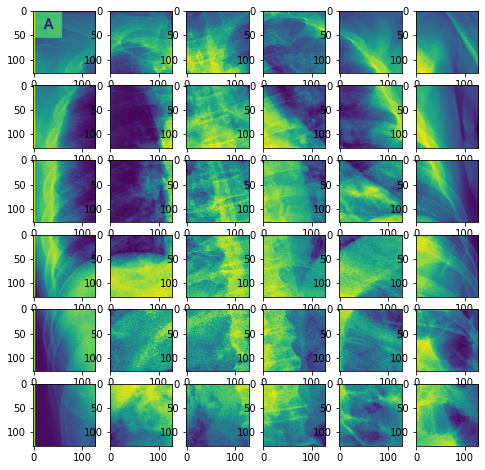

In [115]:
fig, axs = plt.subplots(6, 6, figsize=(8, 8))

ind = 0
for i in range(6):
    for j in range(6):
        axs[i][j].imshow(red_images[ind])
        ind += 1